In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car=pd.read_csv('quikr_car - quikr_car.csv')

In [3]:
car.head()

name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

   kms_driven fuel_type  
0  45,000 kms    Petrol  
1      40 kms    Diesel  
2  22,000 kms    Petrol  
3  28,000 kms    Petrol  
4  36,000 kms    Diesel

In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


#### Creating backup copy

In [6]:
backup=car.copy()

In [7]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [8]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [9]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

### Quality
names are pretty inconsistent<br>
names have company names attached to it<br>
some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'<br>
company: many of the names are not of any company like 'Used', 'URJENT', and so on.<br>
year has many non-year values<br>
year is in object. Change to integer<br>
Price has Ask for Price<br>
Price has commas in its prices and is in object.<br>
kms_driven has object values with kms at last.<br>
It has nan values and two rows have 'Petrol' in them.<br>
fuel_type has nan values.<br>

## Cleaning Data

### year has many non-year values

In [10]:
car=car[car['year'].str.isnumeric()]

### year is in object. Change to integer

In [11]:
car['year']=car['year'].astype(int)

### Price has Ask for Price

In [12]:
car=car[car['Price']!='Ask For Price']

### Price has commas in its prices and is in object

In [13]:
car['Price']=car['Price'].str.replace(',','').astype(int)

### kms_driven has object values with kms at last.

In [14]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

### It has nan values and two rows have 'Petrol' in them

In [15]:
car=car[car['kms_driven'].str.isnumeric()]

In [16]:
car['kms_driven']=car['kms_driven'].astype(int)

### fuel_type has nan values

In [17]:
car=car[~car['fuel_type'].isna()]

In [18]:
car.shape

(816, 6)

### name and company had spammed data...but with the previous cleaning, those rows got removed.<br>
### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [19]:
car['name']=car['name'].str.split().str.slice(0,3).str.join(' ')

### Resetting the index of the final cleaned data

In [20]:
car=car.reset_index(drop=True)

## Cleaned Data

In [21]:
car

name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
812          Tata Indica V2      Tata  2009  110000       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
814            Tata Zest XM      Tata  2018  260000       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]

In [5]:
car.to_csv('Cleaned_Car_data.csv')

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
car.describe(include="all")

name company  year          Price  kms_driven fuel_type
count          892     892   892            892         840       837
unique         525      48    61            274         258         3
top     Honda City  Maruti  2015  Ask For Price  45,000 kms    Petrol
freq            13     235   117             35          30       440

In [9]:
car['Price'] = pd.to_numeric(car['Price'], errors='coerce')
car=car[car['Price']<6000000]

### Checking relationship of Company with Price

In [11]:
car['company'].unique()

array([], dtype=object)

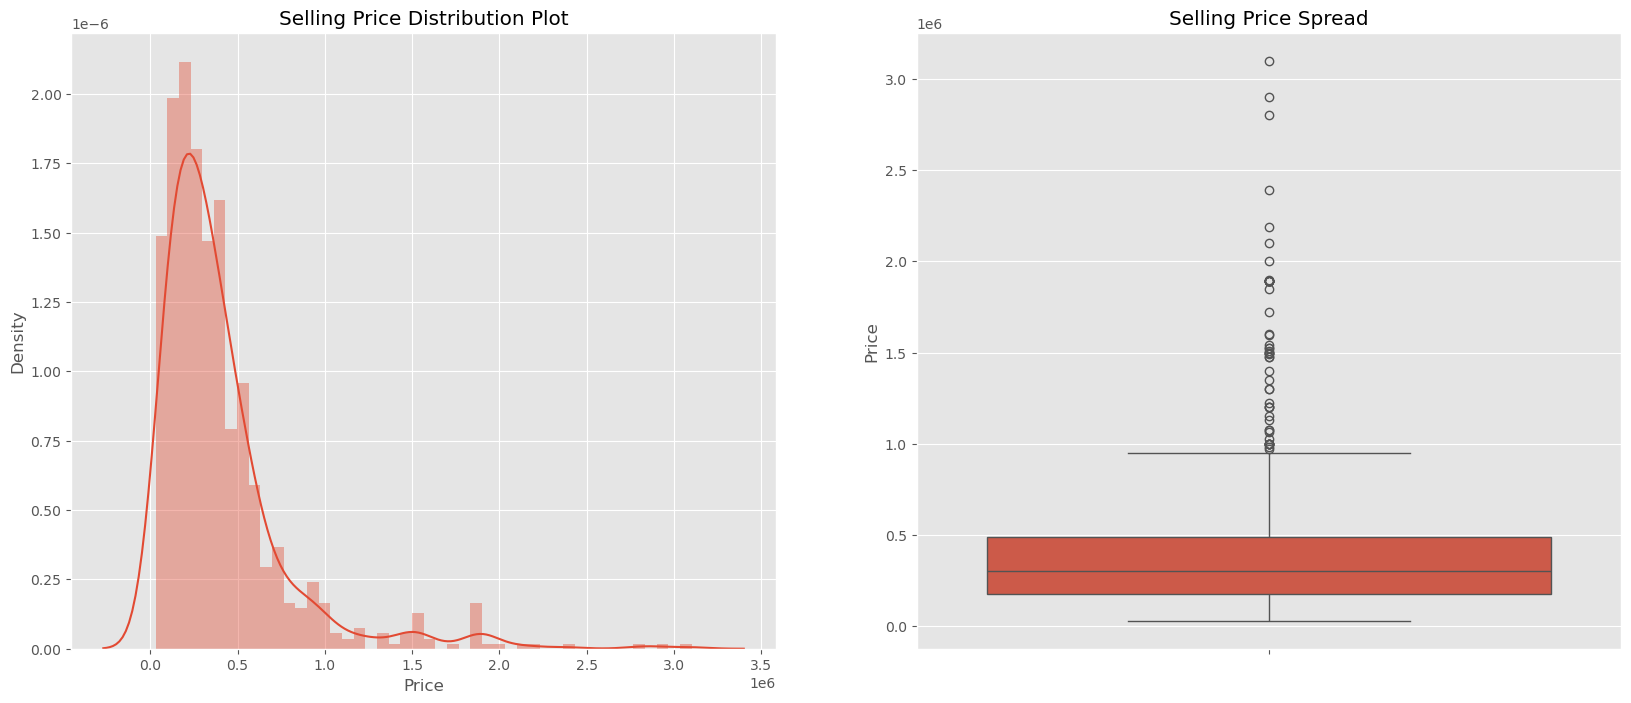

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Selling Price Distribution Plot')
sns.distplot(car.Price)

plt.subplot(1,2,2)
plt.title('Selling Price Spread')
sns.boxplot(y=car.Price)
plt.show()

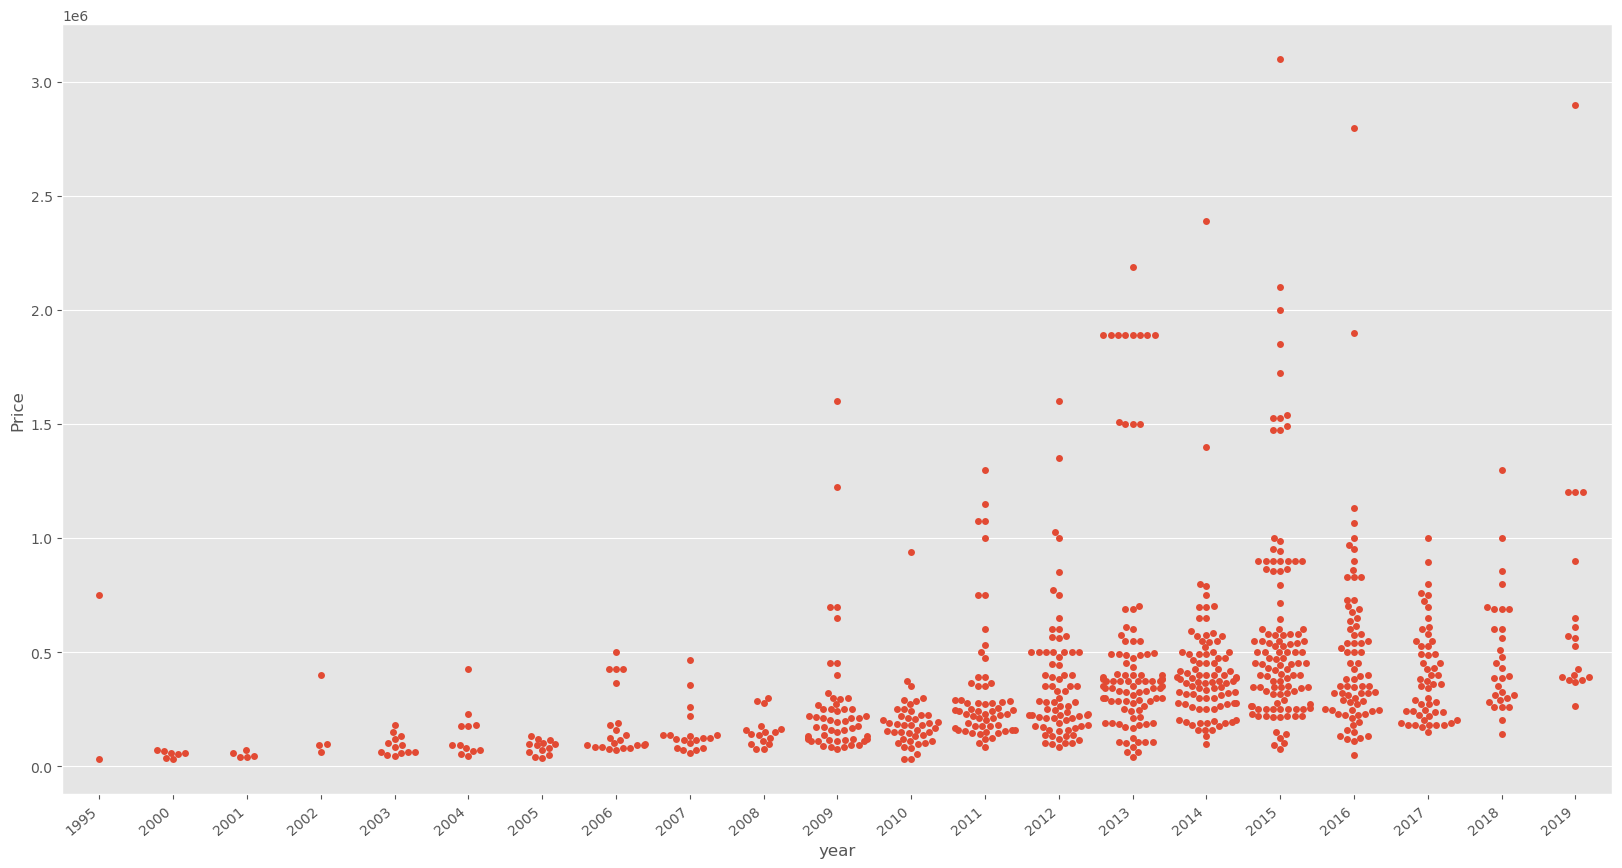

In [28]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.show()

### Checking relationship of kms_driven with Price

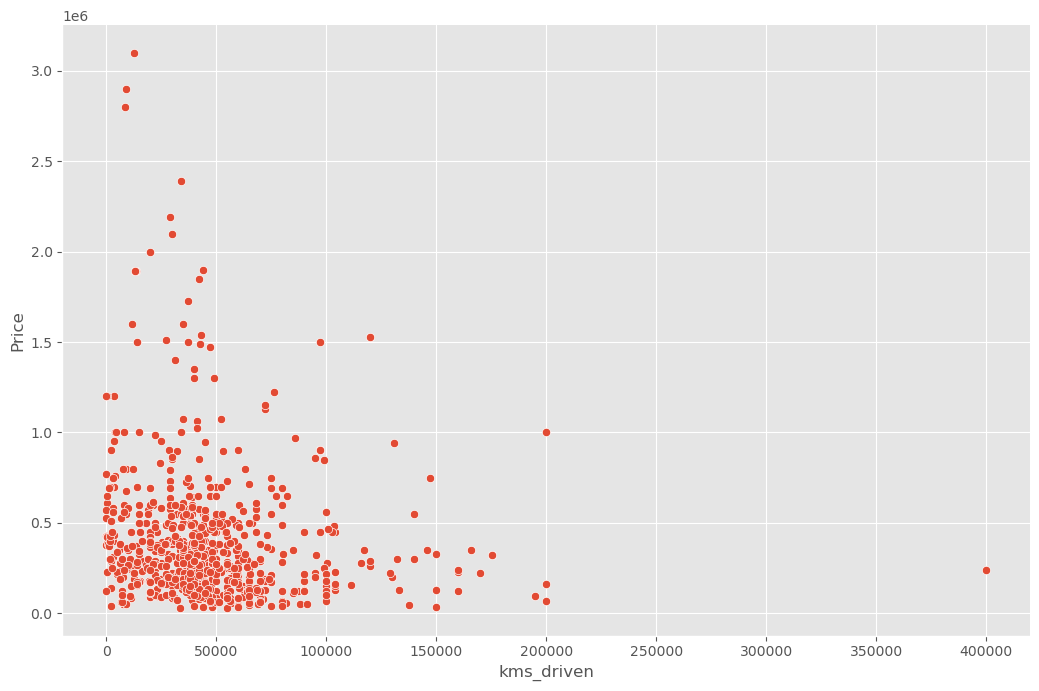

In [29]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

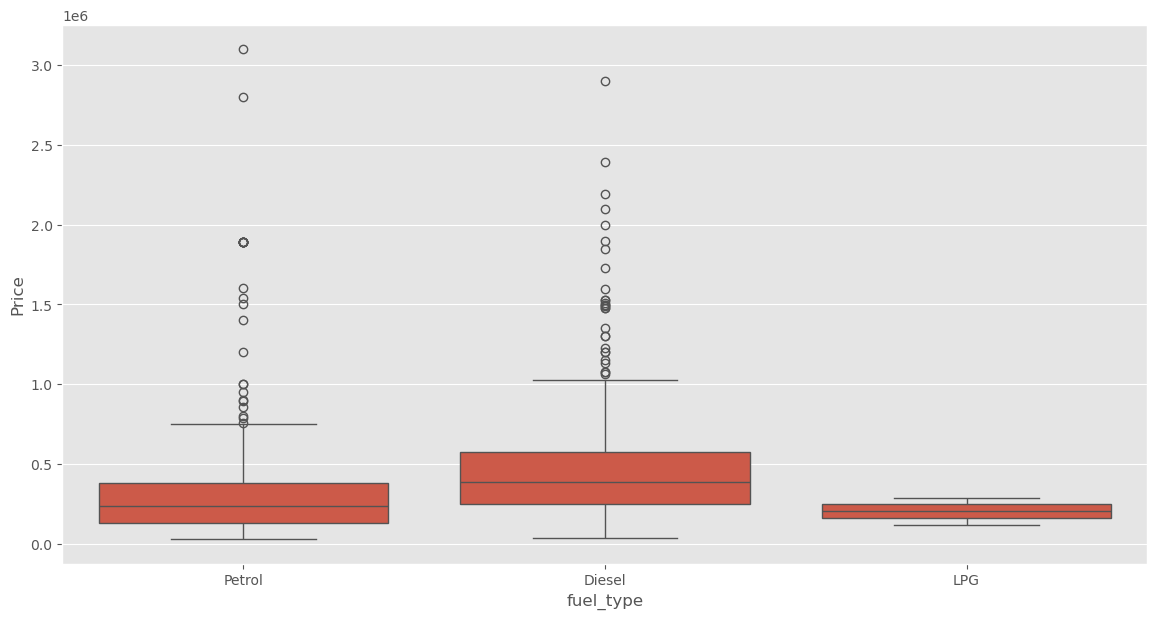

In [30]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

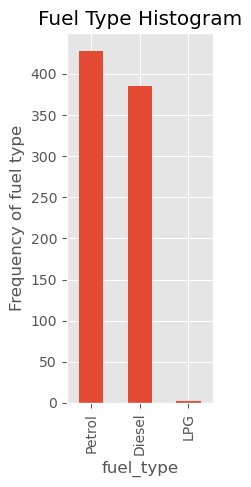

In [31]:
plt.subplot(1,3,2)
plt1 = car.fuel_type.value_counts().plot(kind="bar")
plt.title("Fuel Type Histogram")
plt1.set(xlabel = "fuel_type", ylabel="Frequency of fuel type")
plt.show()

### Relationship of Price with FuelType, Year and Company mixed

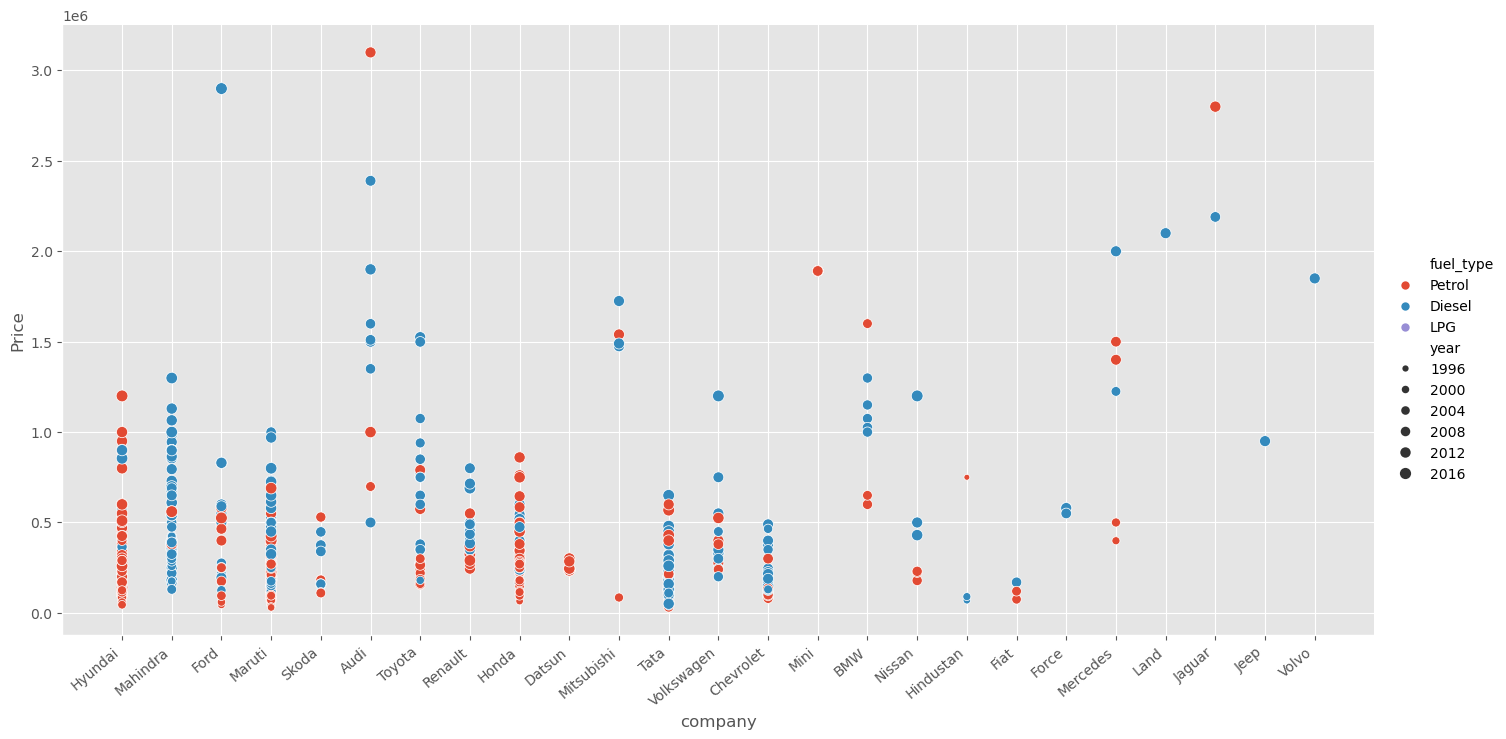

In [32]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

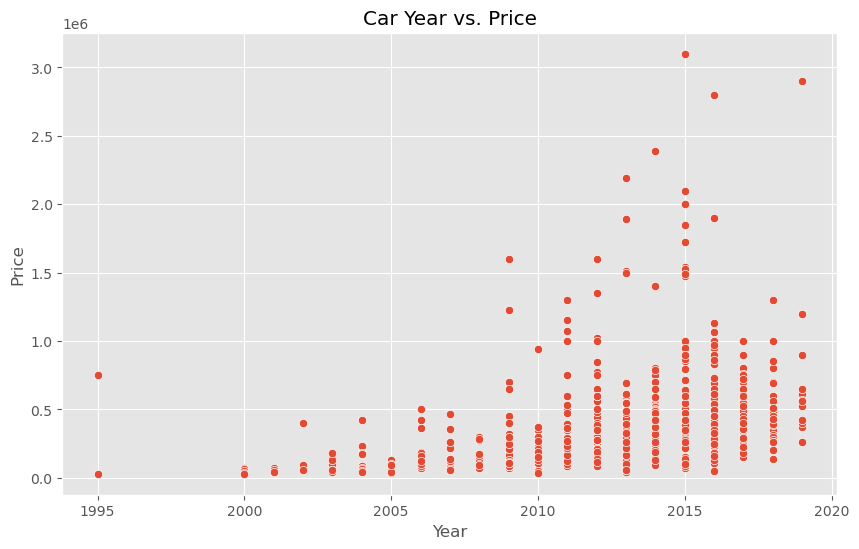

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='Price', data=car)
plt.title('Car Year vs. Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

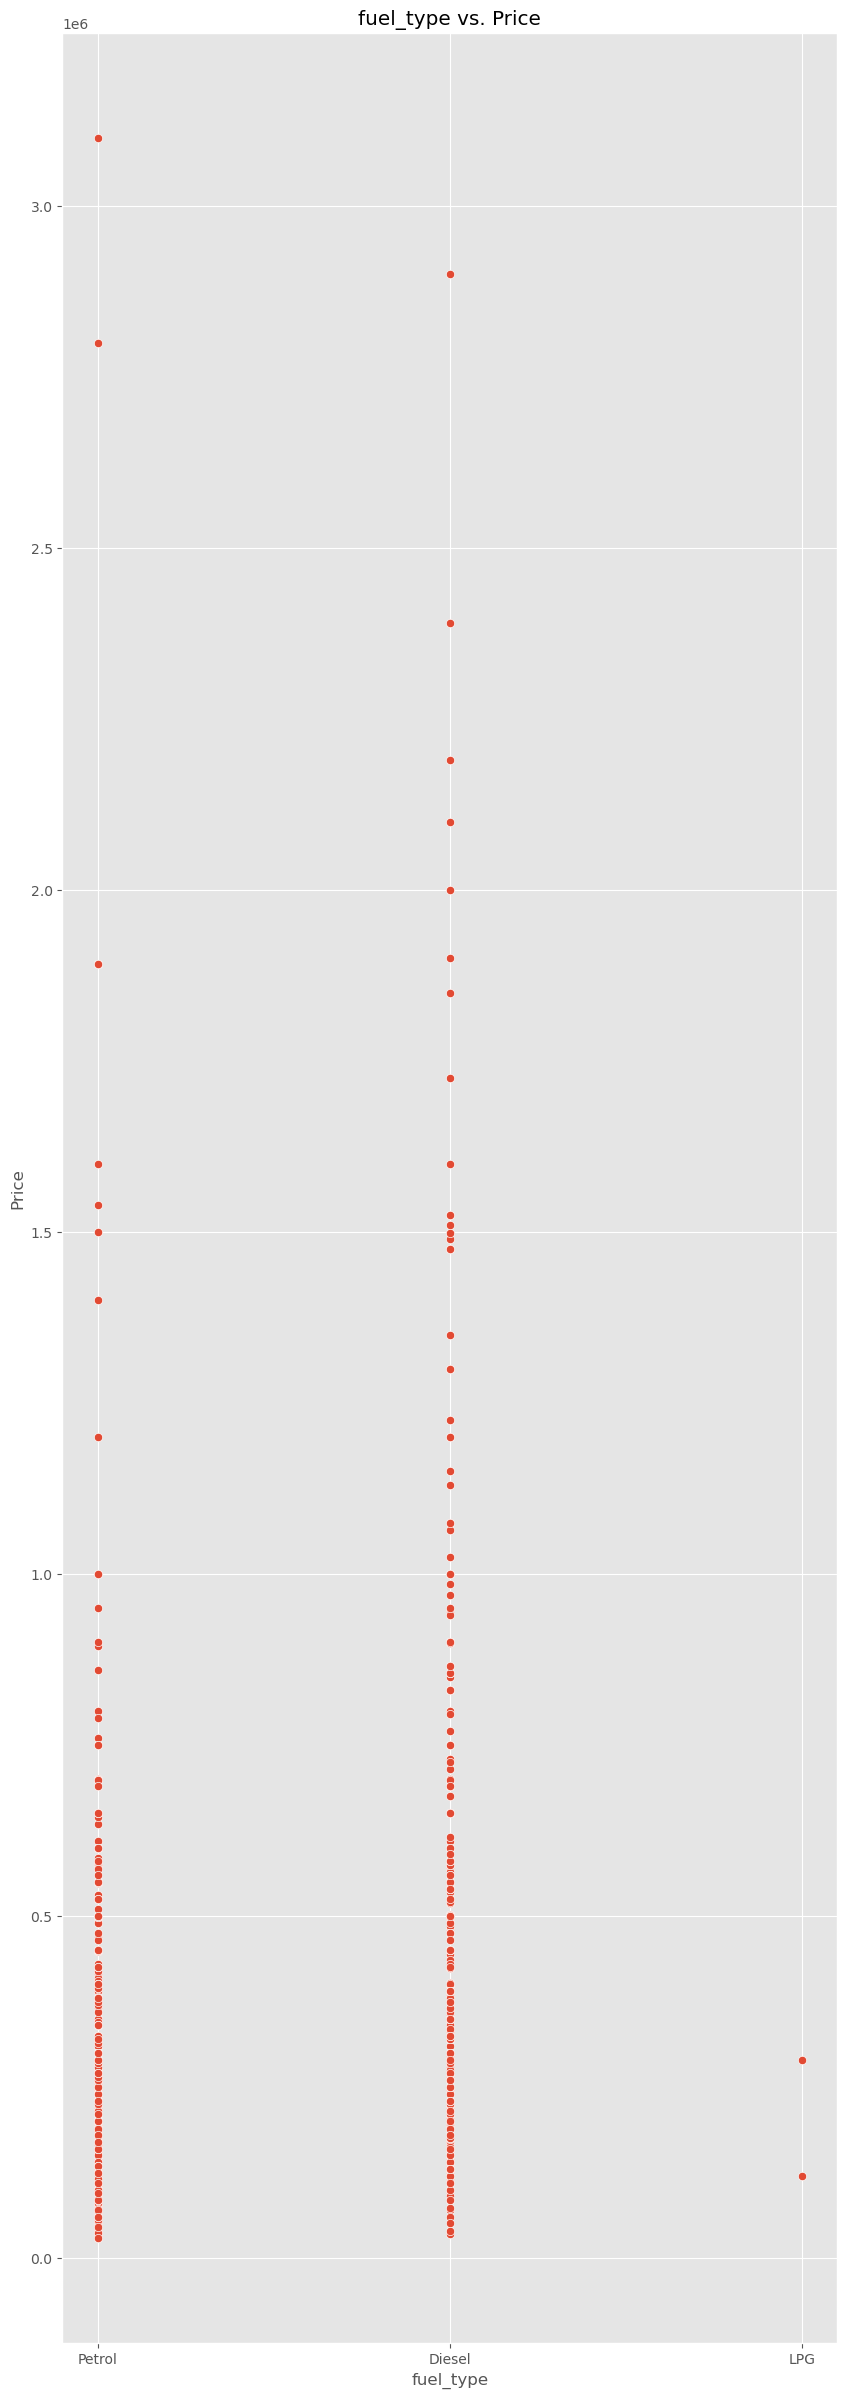

In [34]:
plt.figure(figsize=(10,30))
sns.scatterplot(x='fuel_type', y='Price', data=car)
plt.title('fuel_type vs. Price')
plt.xlabel('fuel_type')
plt.ylabel('Price')
plt.show()

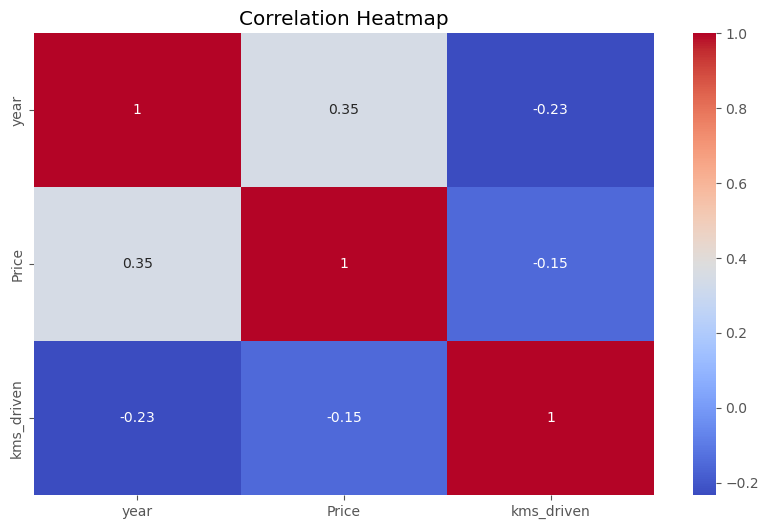

In [35]:
plt.figure(figsize=(10, 6))
correlation_matrix = car.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Extracting Training Data

In [36]:
x=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [37]:
x

name   company  year  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006          40    Diesel
2         Hyundai Grand i10   Hyundai  2014       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014       36000    Diesel
4                 Ford Figo      Ford  2012       41000    Diesel
..                      ...       ...   ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011       50000    Petrol
812          Tata Indica V2      Tata  2009       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009      132000    Petrol
814            Tata Zest XM      Tata  2018       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013       40000    Diesel

[815 rows x 5 columns]

In [38]:
x.shape

(815, 5)

In [39]:
y.shape

(815,)

In [40]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int32

## Applying Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

### Creating an OneHotEncoder object to contain all the possible categories

In [44]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

### Creating a column transformer to transform categorical columns

In [45]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
remainder='passthrough')

### Linear Regression Model

In [46]:
linear=LinearRegression()

### Making a pipeline

In [47]:
pipe=make_pipeline(column_trans,linear)

### Fitting the model

In [48]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [49]:
y_pred=pipe.predict(x_test)

### Checking R2 Score

In [50]:
r2_score(y_test,y_pred)

0.6348794576573284

### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [51]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [52]:
np.argmax(scores)

302

In [53]:
scores[np.argmax(scores)]

0.8991157554877304

In [54]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

### The best model is found at a certain random state

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8991157554877304

In [56]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [57]:
data_to_predict = pd.DataFrame(columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'],
                                data=np.array(['Maruti Suzuki Swift', 'Maruti', 2019, 100000, 'Petrol']).reshape(1, -1))
# Use the modified data for prediction
pipe.predict(data_to_predict)

array([404827.28866092])

In [4]:
def predict_car_price(name, company, year, kms_driven, fuel_type):
    # Creating a DataFrame with the input features
    input_data = pd.DataFrame({
        'name': [name],
        'company': [company],
        'year': [year],
        'kms_driven': [kms_driven],
        'fuel_type': [fuel_type]
    })

    # Making a prediction using your trained pipeline
    predicted_price = pipe.predict(input_data)

    return predicted_price[0]

# driver code
predicted_price = predict_car_price('Audi A6 2.0', 'Audi', 2018, 10000, 'Petrol')
print("Predicted Car Price:", predicted_price)



NameError: name 'pipe' is not defined

### Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

# Defining  model Linear Regression
model = make_pipeline(column_trans, linear)

# Perform k-fold cross-validation here 5 fold
cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')  # Use your dataset (X, y) here

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean R-Squared Score:", mean_cv_score)
print("Standard Deviation of R-Squared Scores:", std_cv_score)

Mean R-Squared Score: 0.5843186037152293
Standard Deviation of R-Squared Scores: 0.1274046527397588
